# **Import thư viện cần thiết**

In [1]:
import pandas as pd
import numpy as np
## Các thư viện
import matplotlib.pyplot  as plt
import numpy              as np
import pandas             as pd
import seaborn            as sbn
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore') # tắt những cảnh báo
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.seasonal import seasonal_decompose


# **Load dataset**

In [2]:
from datasets import load_dataset

ds = load_dataset("Dingdong-Inc/FreshRetailNet-50K")

print(ds)

data_all = pd.concat([
    ds["train"].to_pandas(),
    ds["eval"].to_pandas()
], ignore_index=True)


DatasetDict({
    train: Dataset({
        features: ['city_id', 'store_id', 'management_group_id', 'first_category_id', 'second_category_id', 'third_category_id', 'product_id', 'dt', 'sale_amount', 'hours_sale', 'stock_hour6_22_cnt', 'hours_stock_status', 'discount', 'holiday_flag', 'activity_flag', 'precpt', 'avg_temperature', 'avg_humidity', 'avg_wind_level'],
        num_rows: 4500000
    })
    eval: Dataset({
        features: ['city_id', 'store_id', 'management_group_id', 'first_category_id', 'second_category_id', 'third_category_id', 'product_id', 'dt', 'sale_amount', 'hours_sale', 'stock_hour6_22_cnt', 'hours_stock_status', 'discount', 'holiday_flag', 'activity_flag', 'precpt', 'avg_temperature', 'avg_humidity', 'avg_wind_level'],
        num_rows: 350000
    })
})


In [3]:
data_all['dt'] = pd.to_datetime(data_all['dt'], errors='coerce')

# **Khám phá dữ liệu (EDA)**

In [4]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850000 entries, 0 to 4849999
Data columns (total 19 columns):
 #   Column               Dtype         
---  ------               -----         
 0   city_id              int64         
 1   store_id             int64         
 2   management_group_id  int64         
 3   first_category_id    int64         
 4   second_category_id   int64         
 5   third_category_id    int64         
 6   product_id           int64         
 7   dt                   datetime64[ns]
 8   sale_amount          float64       
 9   hours_sale           object        
 10  stock_hour6_22_cnt   int32         
 11  hours_stock_status   object        
 12  discount             float64       
 13  holiday_flag         int32         
 14  activity_flag        int32         
 15  precpt               float64       
 16  avg_temperature      float64       
 17  avg_humidity         float64       
 18  avg_wind_level       float64       
dtypes: datetime64[ns](1),

In [5]:
data_all.describe()

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,stock_hour6_22_cnt,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
count,4.850000e+06,4.850000e+06,4.850000e+06,4.850000e+06,4.850000e+06,4.850000e+06,4.850000e+06,4850000,4.850000e+06,4.850000e+06,4.850000e+06,4.850000e+06,4.850000e+06,4.850000e+06,4.850000e+06,4.850000e+06,4.850000e+06
mean,4.974420e+00,4.090807e+02,4.621640e+00,1.521366e+01,4.473508e+01,1.163621e+02,3.904260e+02,2024-05-14 23:59:59.999999488,1.012625e+00,3.159911e+00,9.119001e-01,3.402062e-01,3.749041e-01,3.856031e+00,2.276503e+01,7.474197e+01,1.720264e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2024-03-28 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.206000e+01,2.735000e+01,9.700000e-01
25%,0.000000e+00,1.950000e+02,3.000000e+00,5.000000e+00,2.800000e+01,7.700000e+01,1.350000e+02,2024-04-21 00:00:00,4.000000e-01,0.000000e+00,8.510000e-01,0.000000e+00,0.000000e+00,1.493900e+00,1.965000e+01,7.197000e+01,1.440000e+00
50%,0.000000e+00,3.950000e+02,6.000000e+00,1.600000e+01,3.800000e+01,1.110000e+02,3.630000e+02,2024-05-15 00:00:00,7.000000e-01,0.000000e+00,9.910000e-01,0.000000e+00,0.000000e+00,2.424000e+00,2.284000e+01,7.660000e+01,1.620000e+00
75%,1.200000e+01,5.980000e+02,6.000000e+00,2.100000e+01,6.600000e+01,1.670000e+02,6.330000e+02,2024-06-08 00:00:00,1.100000e+00,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.073300e+00,2.607000e+01,8.077000e+01,1.930000e+00
max,1.700000e+01,8.970000e+02,6.000000e+00,3.100000e+01,8.300000e+01,2.320000e+02,8.640000e+02,2024-07-02 00:00:00,4.990000e+01,1.600000e+01,1.088000e+00,1.000000e+00,1.000000e+00,4.250000e+01,3.229000e+01,1.000000e+02,3.850000e+00
std,6.096600e+00,2.485456e+02,1.962418e+00,8.972127e+00,2.233890e+01,5.756036e+01,2.634697e+02,NaN,1.449945e+00,4.587389e+00,1.277608e-01,4.737784e-01,4.840982e-01,3.655118e+00,3.886412e+00,9.885845e+00,3.841277e-01


In [6]:
print(min(data_all['dt']))
print(max(data_all['dt']))


2024-03-28 00:00:00
2024-07-02 00:00:00


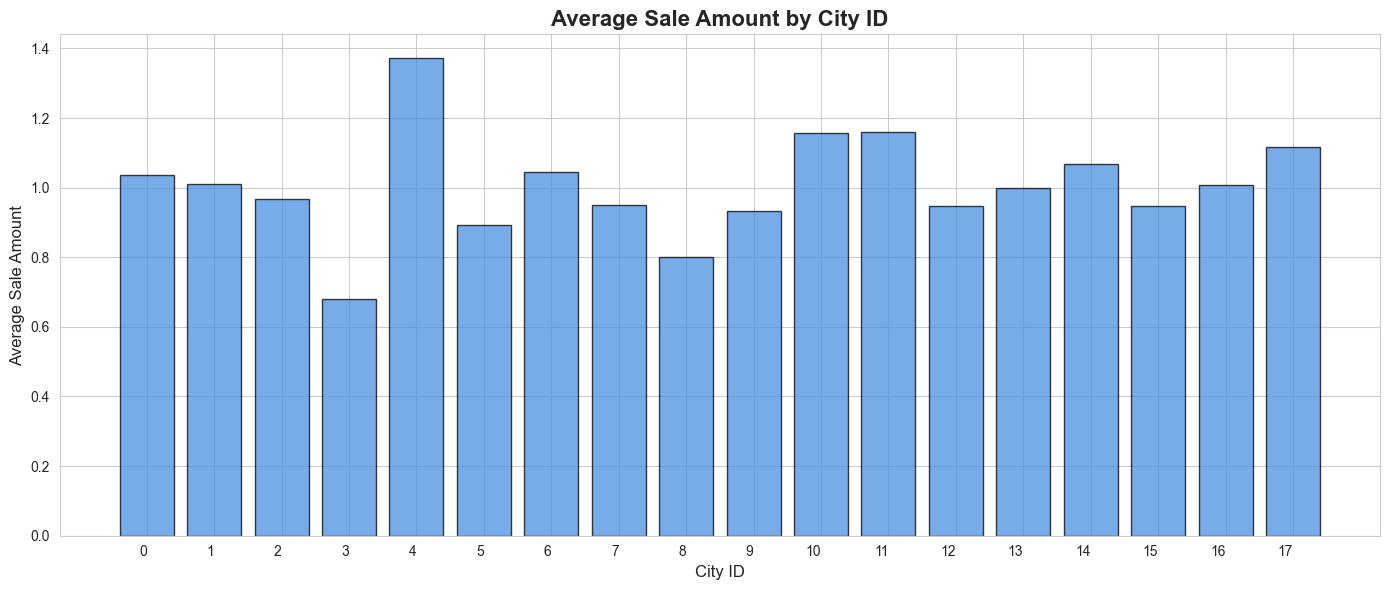

In [7]:
sbn.set_style("whitegrid")

# 1. Nhóm theo city_id và tính tổng sale_amount
df_city = (
    data_all.groupby('city_id')['sale_amount']
            .mean()
            .sort_index()   # ✔ Sort theo city_id tăng dần
)

plt.figure(figsize=(14, 6))

plt.bar(
    df_city.index,      # ✔ Trục X là city_id thật
    df_city.values,
    color="#4A90E2",
    alpha=0.75,
    edgecolor="black"
)

plt.title("Average Sale Amount by City ID", fontsize=16, weight='bold')
plt.xlabel("City ID", fontsize=12)
plt.ylabel("Average Sale Amount", fontsize=12)

plt.xticks(df_city.index, ha='right')   # ✔ Hiển thị đúng city_id

plt.tight_layout()
plt.show()

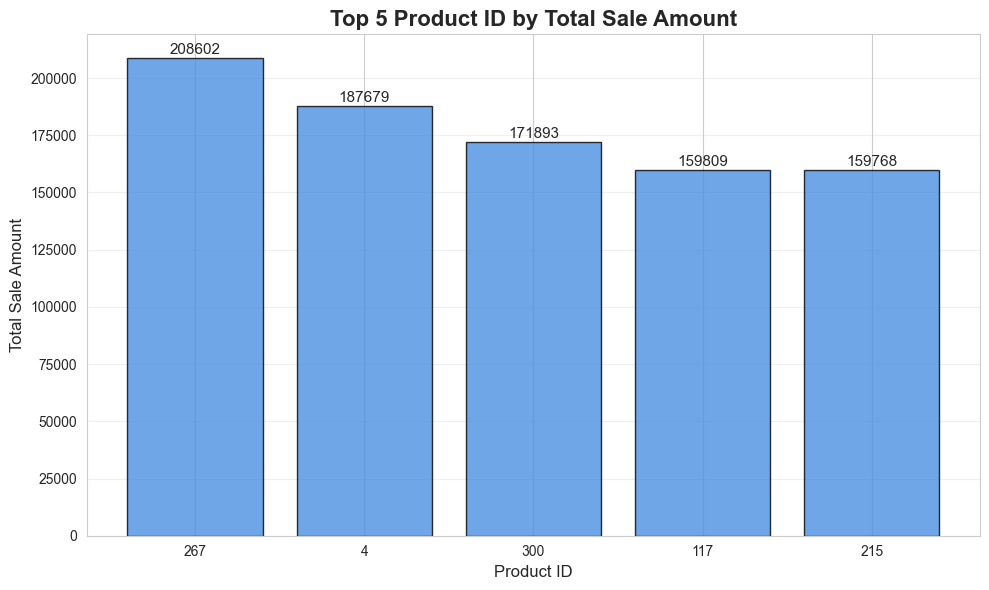

In [8]:

# 1. Lấy top 5 product_id có tổng sale_amount cao nhất
top5_products = (
    data_all.groupby('product_id')['sale_amount']
            .sum()
            .sort_values(ascending=False)
            .head(5)
)

plt.figure(figsize=(10, 6))

plt.bar(
    top5_products.index.astype(str),
    top5_products.values,
    color="#4A90E2",
    edgecolor="black",
    alpha=0.8
)

# Title & labels
plt.title("Top 5 Product ID by Total Sale Amount", fontsize=16, weight="bold")
plt.xlabel("Product ID", fontsize=12)
plt.ylabel("Total Sale Amount", fontsize=12)

# Hiển thị giá trị trên đầu cột
for idx, val in enumerate(top5_products.values):
    plt.text(idx, val + val*0.01, f"{val:.0f}", ha='center', fontsize=11)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

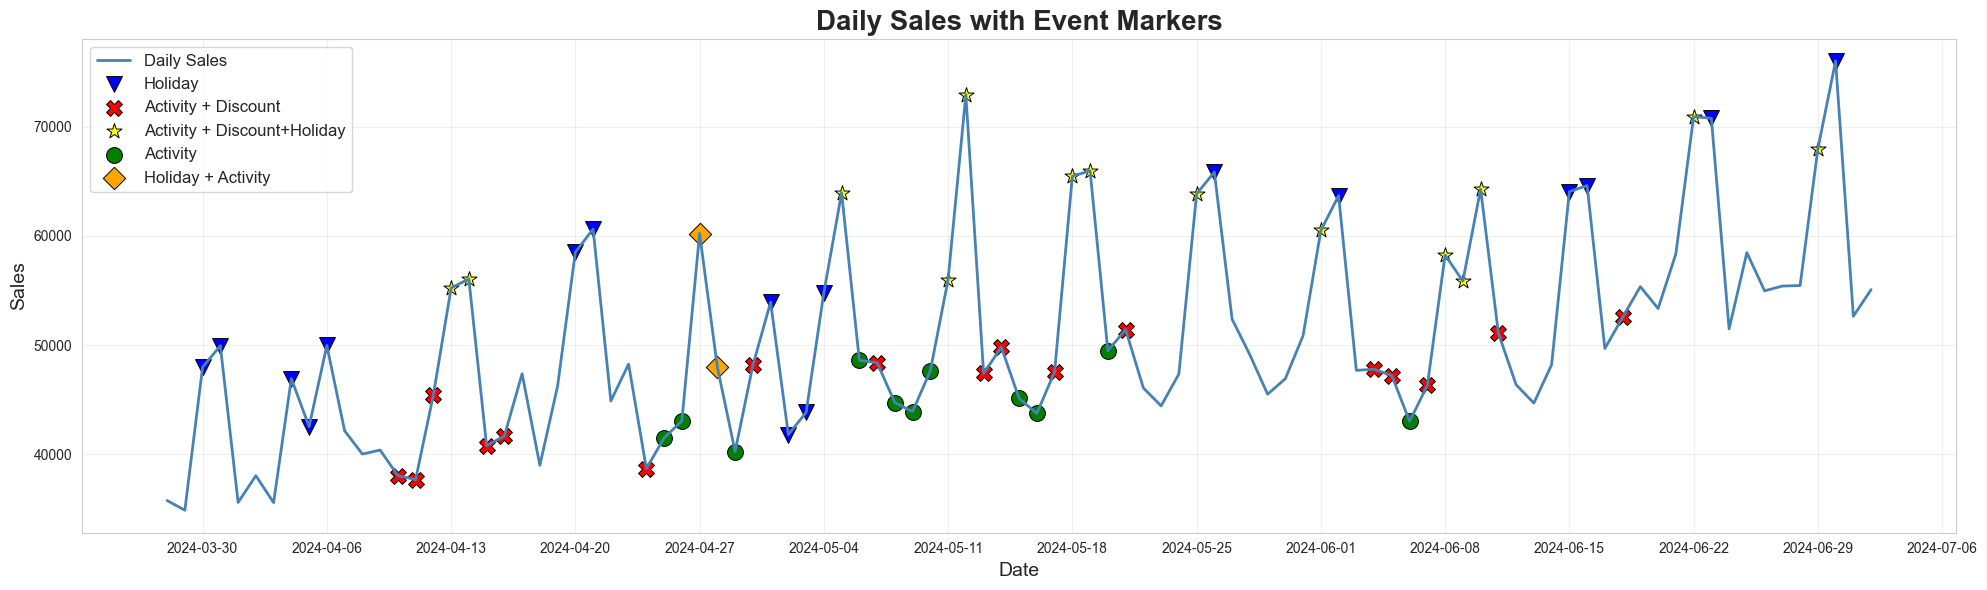

In [9]:
# --- Event ID ---
data_all['event_id'] = (
    data_all['holiday_flag']*4 +
    data_all['activity_flag']*2 +
    (data_all['discount'] < 1).astype(int)
)

# Marker mapping
marker_map = {
    4: ('v','blue','Holiday'),
    2: ('o','green','Activity'),
    1: ('^','purple','Discount'),
    6: ('D','orange','Holiday + Activity'),
    5: ('P','blue','Holiday + Discount'),
    3: ('X','red','Activity + Discount'),
    7: ('*','yellow','Activity + Discount+Holiday')
}

# --- Daily aggregate ---
data_all['date_only'] = data_all['dt'].dt.date
daily_sales = data_all.groupby('date_only')['sale_amount'].sum().sort_index()

# --- Plot ---
plt.figure(figsize=(20,6))
plt.plot(daily_sales.index, daily_sales.values,
         color='steelblue', linewidth=2.0, label='Daily Sales')

# --- Markers ---
used_labels = set()
unique_days = data_all.drop_duplicates('date_only')

for _, row in unique_days.iterrows():
    eid = row['event_id']
    if eid == 0:
        continue

    d = row['date_only']
    if d not in daily_sales.index:
        continue

    marker, color, label = marker_map[eid]

    # tránh trùng legend
    lbl = label if label not in used_labels else None
    used_labels.add(label)

    plt.scatter(
        d, daily_sales.loc[d],
        color=color, marker=marker, s=130,
        edgecolor='black', linewidth=0.7,
        label=lbl
    )

# --- Formatting ---
plt.title("Daily Sales with Event Markers", fontsize=20, weight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.grid(alpha=0.3)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xticks( fontsize=10)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



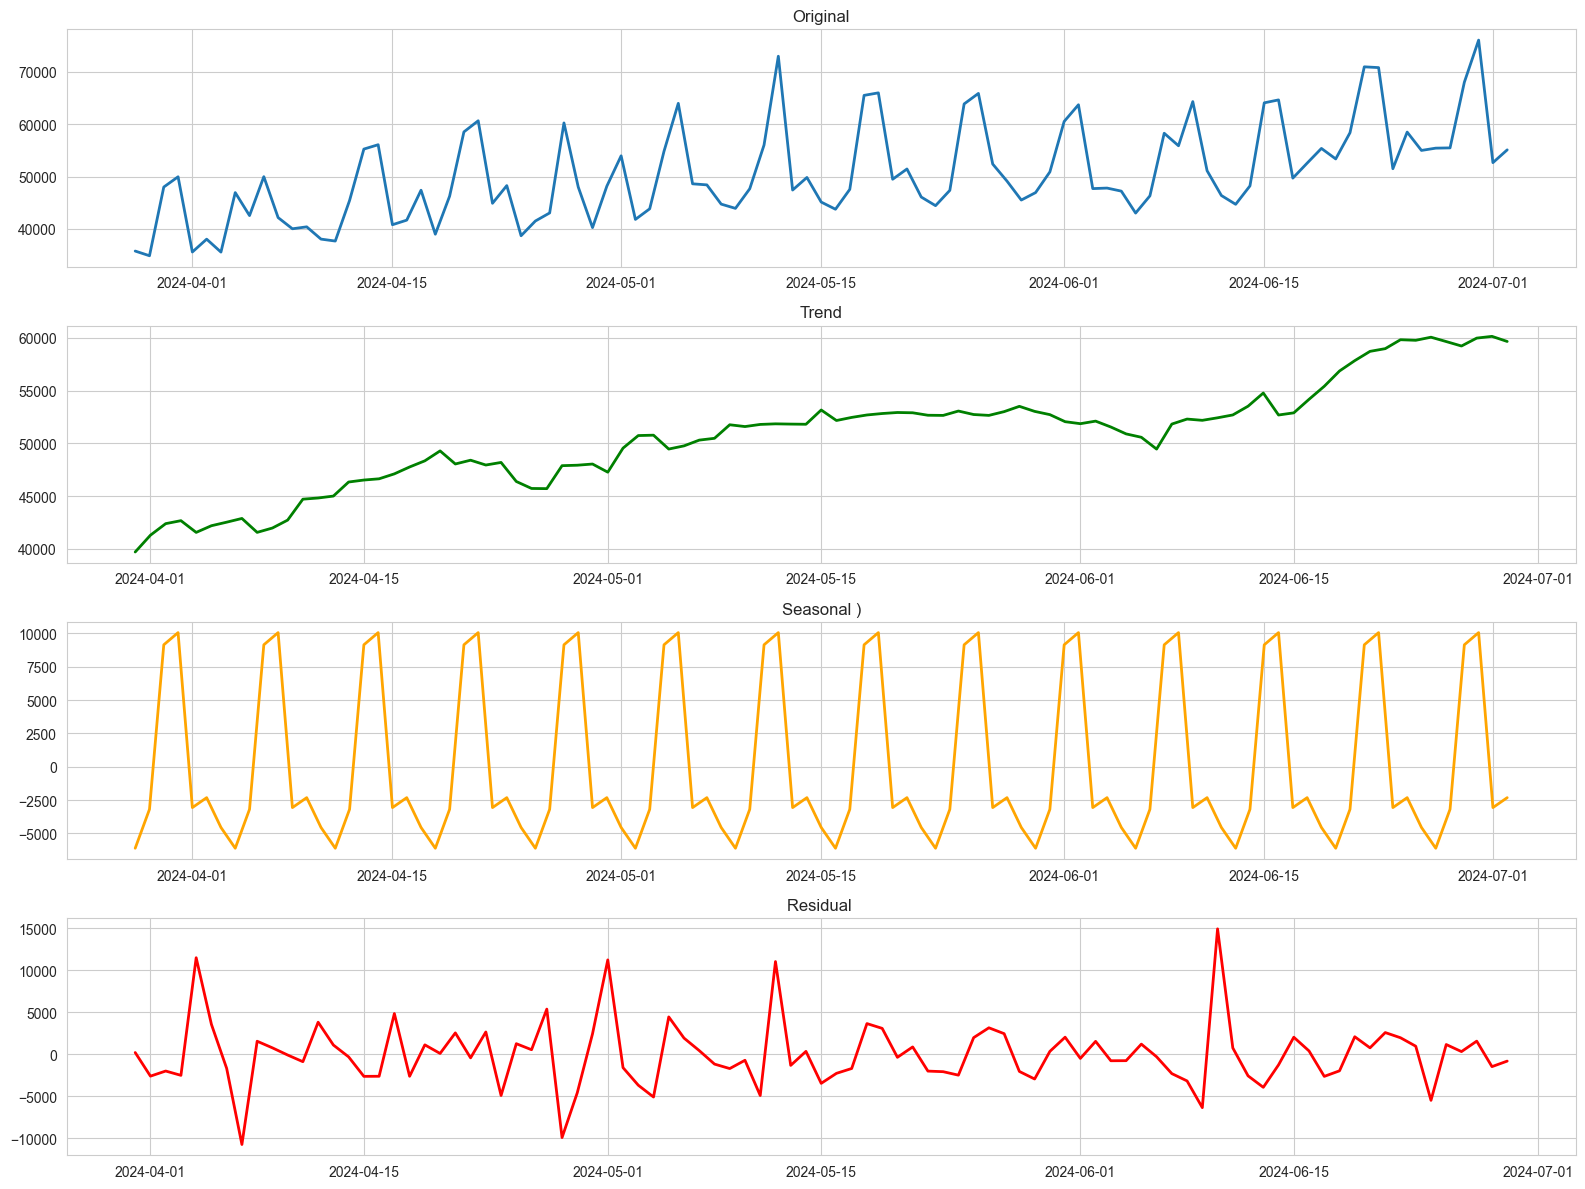

In [10]:
# 1. Aggregate theo ngày
daily_sales = (
    data_all.groupby('dt')['sale_amount']
            .sum()
            .sort_index()
)

# 2. Set daily frequency (fill NA = 0)
daily_sales = daily_sales.asfreq('D').fillna(0)

# 3. Decompose theo season chu kỳ 7 ngày
result = seasonal_decompose(x=daily_sales,model='additive',period=7
)
fig, axes = plt.subplots(4, 1, figsize=(16, 12))
axes[0].plot(result.observed, linewidth=2)
axes[0].set_title("Original")

axes[1].plot(result.trend, color='green', linewidth=2)
axes[1].set_title("Trend")

axes[2].plot(result.seasonal, color='orange', linewidth=2)
axes[2].set_title("Seasonal )")

axes[3].plot(result.resid, color='red', linewidth=2)
axes[3].set_title("Residual ")
plt.tight_layout()
plt.show()

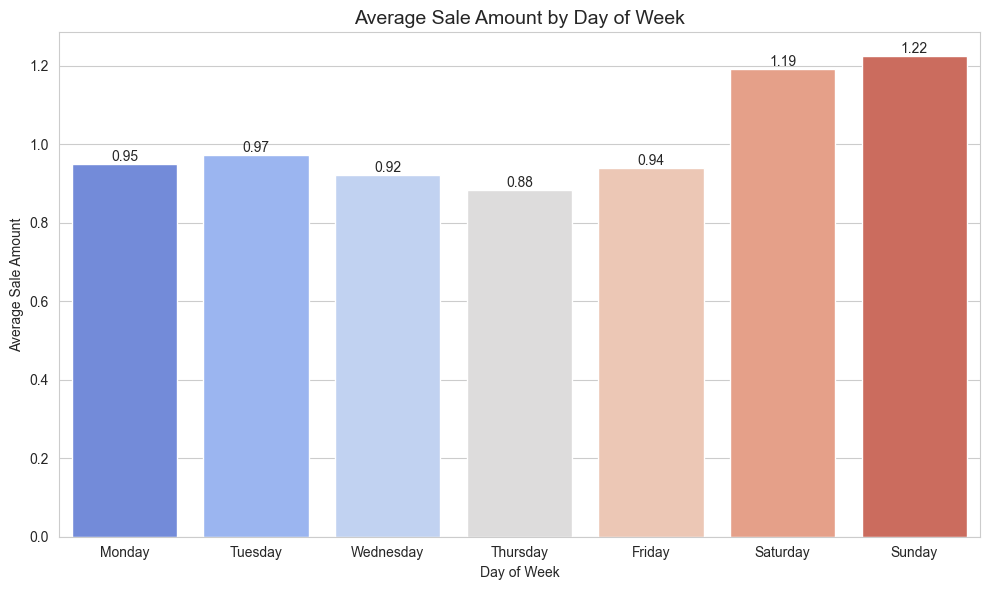

In [11]:
# 1. Tạo biến weekday
data_all['weekday'] = data_all['dt'].dt.day_name()

order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

weekday_sale = (
    data_all.groupby('weekday')['sale_amount']
    .mean()
    .reindex(order)
)

# Nếu có ngày nào không có data → NaN, ta cho = 0 để tránh lỗi
weekday_sale = weekday_sale.fillna(0)

# 2. Gradient colors cho đủ 7 cột
colors = sbn.color_palette("coolwarm", n_colors=len(weekday_sale))

# 3. Vẽ biểu đồ
plt.figure(figsize=(10,6))
ax = sbn.barplot(
    x=weekday_sale.index,
    y=weekday_sale.values,
    palette=colors,
    ci=None         )
plt.title("Average Sale Amount by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Average Sale Amount")

# 4. Gắn nhãn: làm tròn 2 chữ số thập phân
for i, day in enumerate(weekday_sale.index):
    val = weekday_sale.loc[day]
    ax.text(
        i,
        val,
        f"{val:,.2f}",   # ⭐ làm tròn đến 2 chữ số thập phân
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


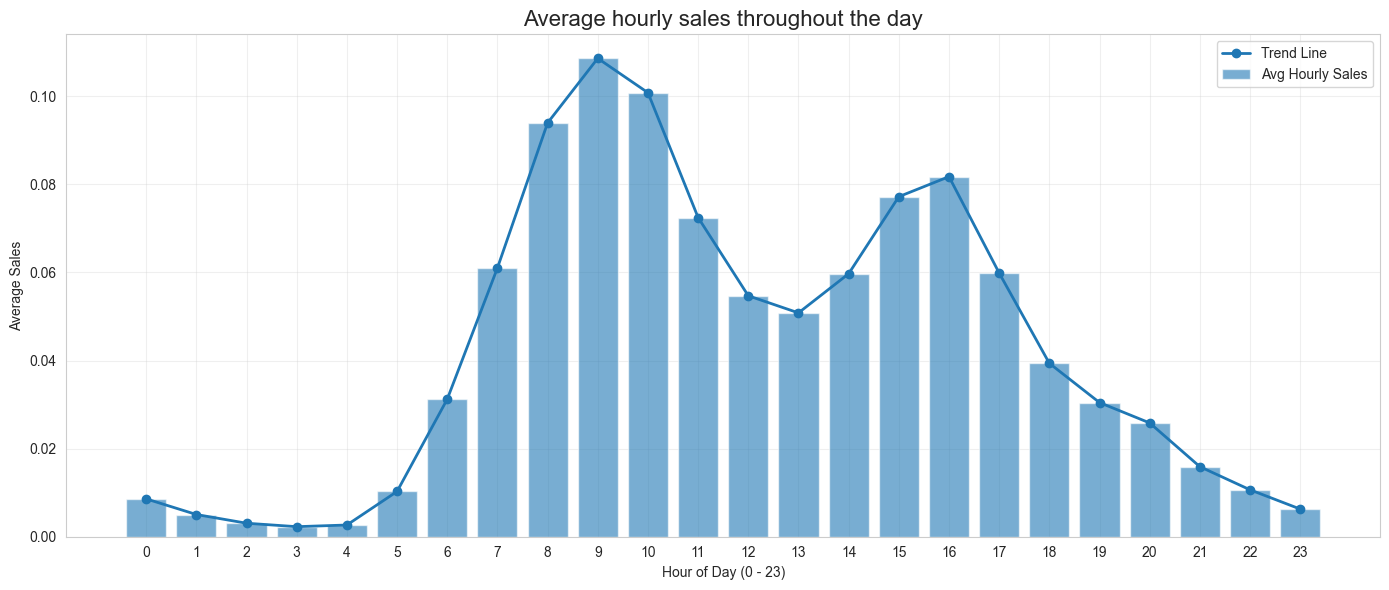

In [12]:
# Tách dữ liệu hourly trong hours_sale (list 24 giá trị)
expanded = data_all[['hours_sale']].copy()

# Chuyển mỗi sequence thành 24 cột hour_0 ... hour_23
expanded = expanded['hours_sale'].apply(pd.Series)
expanded.columns = [f'hour_{i}' for i in range(24)]
hourly_mean = expanded.mean()
hourly_mean.index = range(24)   # 0 → 23h
plt.figure(figsize=(14,6))

# Bar chart
plt.bar(hourly_mean.index, hourly_mean.values, alpha=0.6, label='Avg Hourly Sales')

# Line chart
plt.plot(hourly_mean.index, hourly_mean.values, marker='o', linewidth=2, label='Trend Line')

plt.title("Average hourly sales throughout the day", fontsize=16)
plt.xlabel("Hour of Day (0 - 23)")
plt.ylabel("Average Sales")
plt.xticks(range(24))

plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

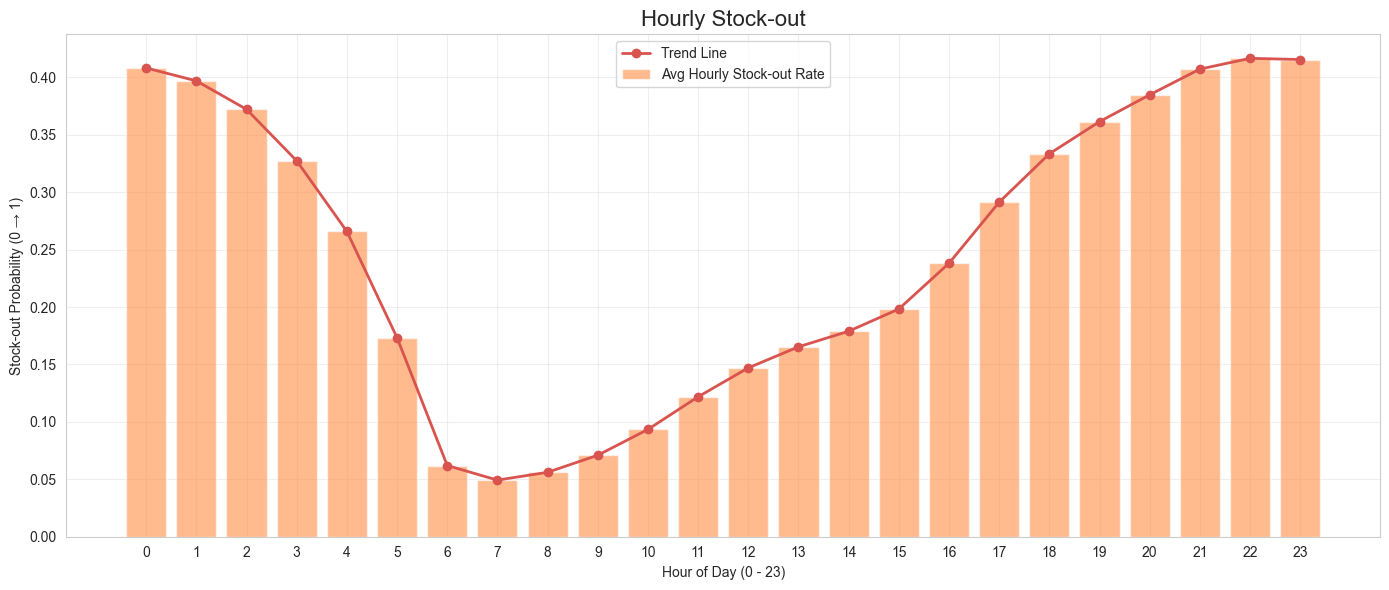

In [13]:
# Tách dữ liệu hourly trong hours_stock_status (list 24 giá trị)
expanded_oos = data_all[['hours_stock_status']].copy()

# Chuyển mỗi sequence thành 24 cột hour_0 ... hour_23
expanded_oos = expanded_oos['hours_stock_status'].apply(pd.Series)
expanded_oos.columns = [f'hour_{i}' for i in range(24)]

# Mean theo từng giờ → probability stockout
hourly_oos = expanded_oos.mean()
hourly_oos.index = range(24)

plt.figure(figsize=(14,6))

# --- Bar chart ---
plt.bar(hourly_oos.index, hourly_oos.values, alpha=0.6, color='#FF8C42',
        label='Avg Hourly Stock-out Rate')

# --- Line chart ---
plt.plot(hourly_oos.index, hourly_oos.values, marker='o',
         linewidth=2, color='#D9534F', label='Trend Line')

plt.title("Hourly Stock-out", fontsize=16)
plt.xlabel("Hour of Day (0 - 23)")
plt.ylabel("Stock-out Probability (0 → 1)")
plt.xticks(range(24))

plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

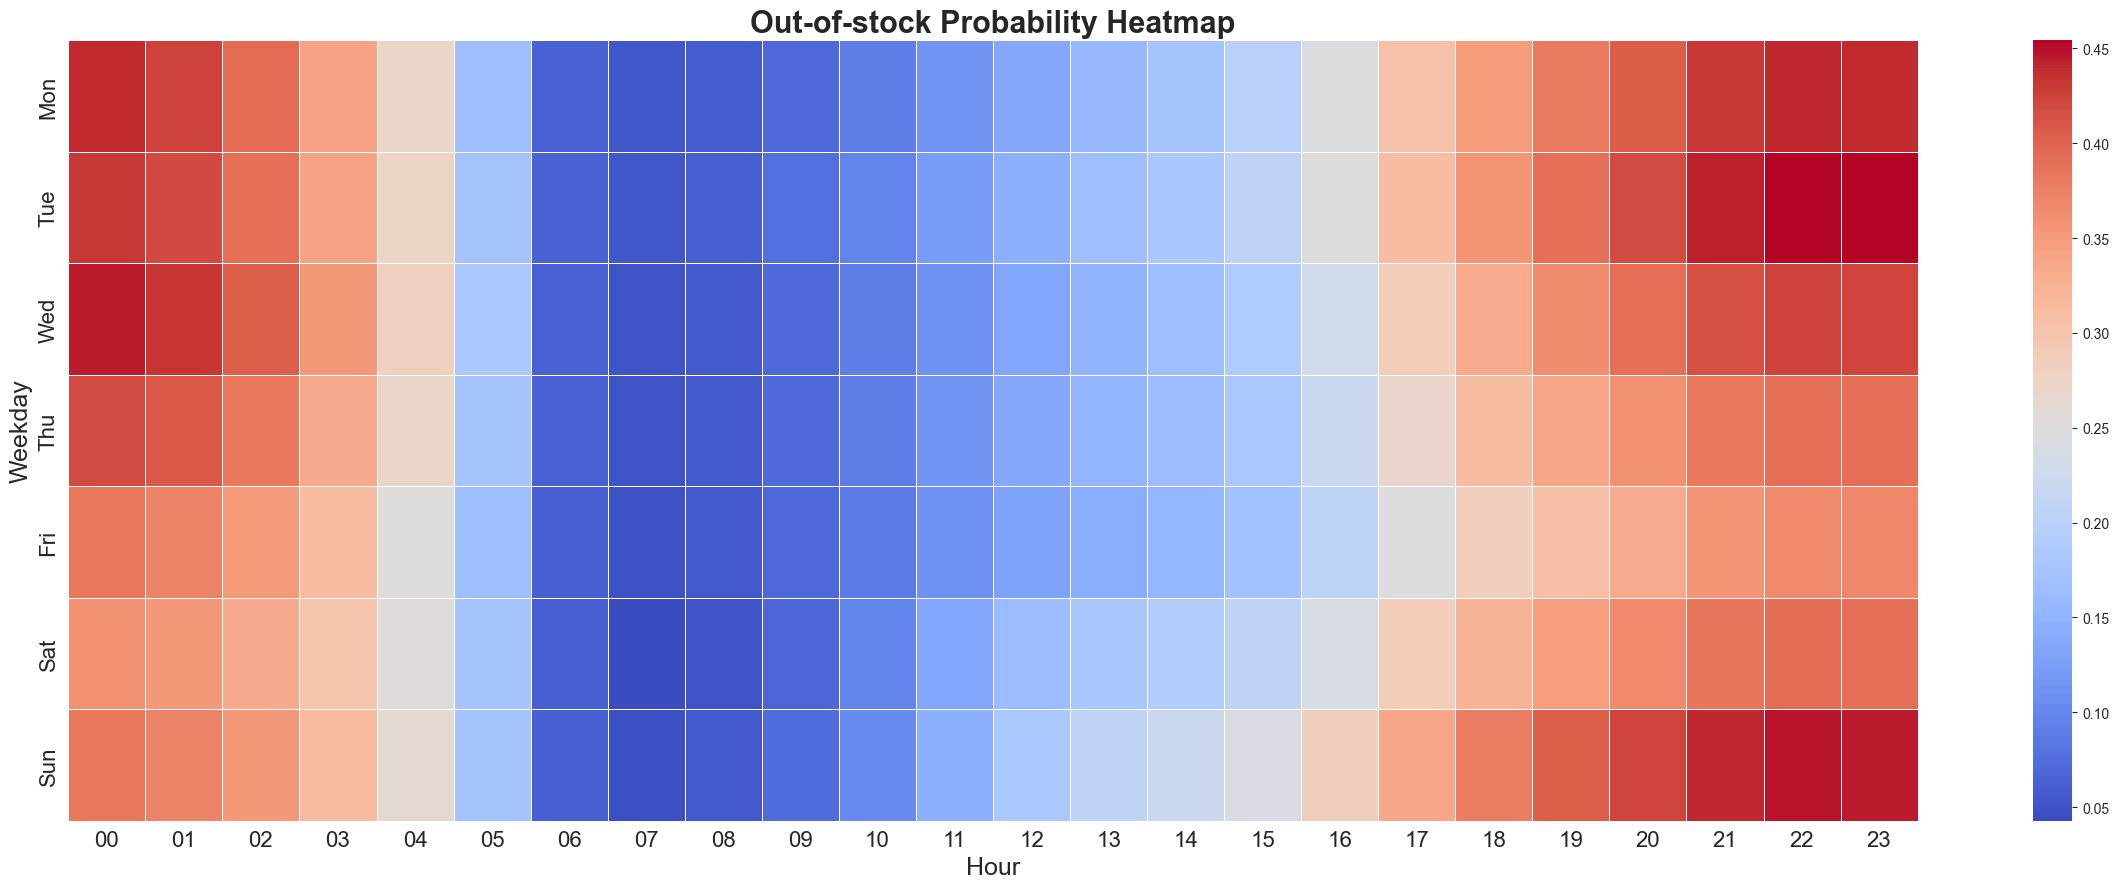

In [14]:
# --- Chuẩn bị dữ liệu ---
data_all['weekday'] = data_all['dt'].dt.weekday
oos_matrix = np.stack(data_all['hours_stock_status'])

# Tạo heatmap 7×24
oos_heatmap = np.array([
    oos_matrix[data_all['weekday'] == w].mean(axis=0)
    if (data_all['weekday'] == w).any() else np.full(24, np.nan)
    for w in range(7)
])

# --- Vẽ heatmap ---
plt.figure(figsize=(24, 9))

ax = sbn.heatmap(
    oos_heatmap,
    cmap="coolwarm",
    xticklabels=[f"{h:02d}" for h in range(24)],
    yticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
    linewidths=0.7,
    linecolor='white'
)

plt.title("Out-of-stock Probability Heatmap", fontsize=22, weight='bold')
plt.xlabel("Hour", fontsize=18)
plt.ylabel("Weekday", fontsize=18)

# Tăng cỡ chữ tick
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

plt.tight_layout()
plt.show()

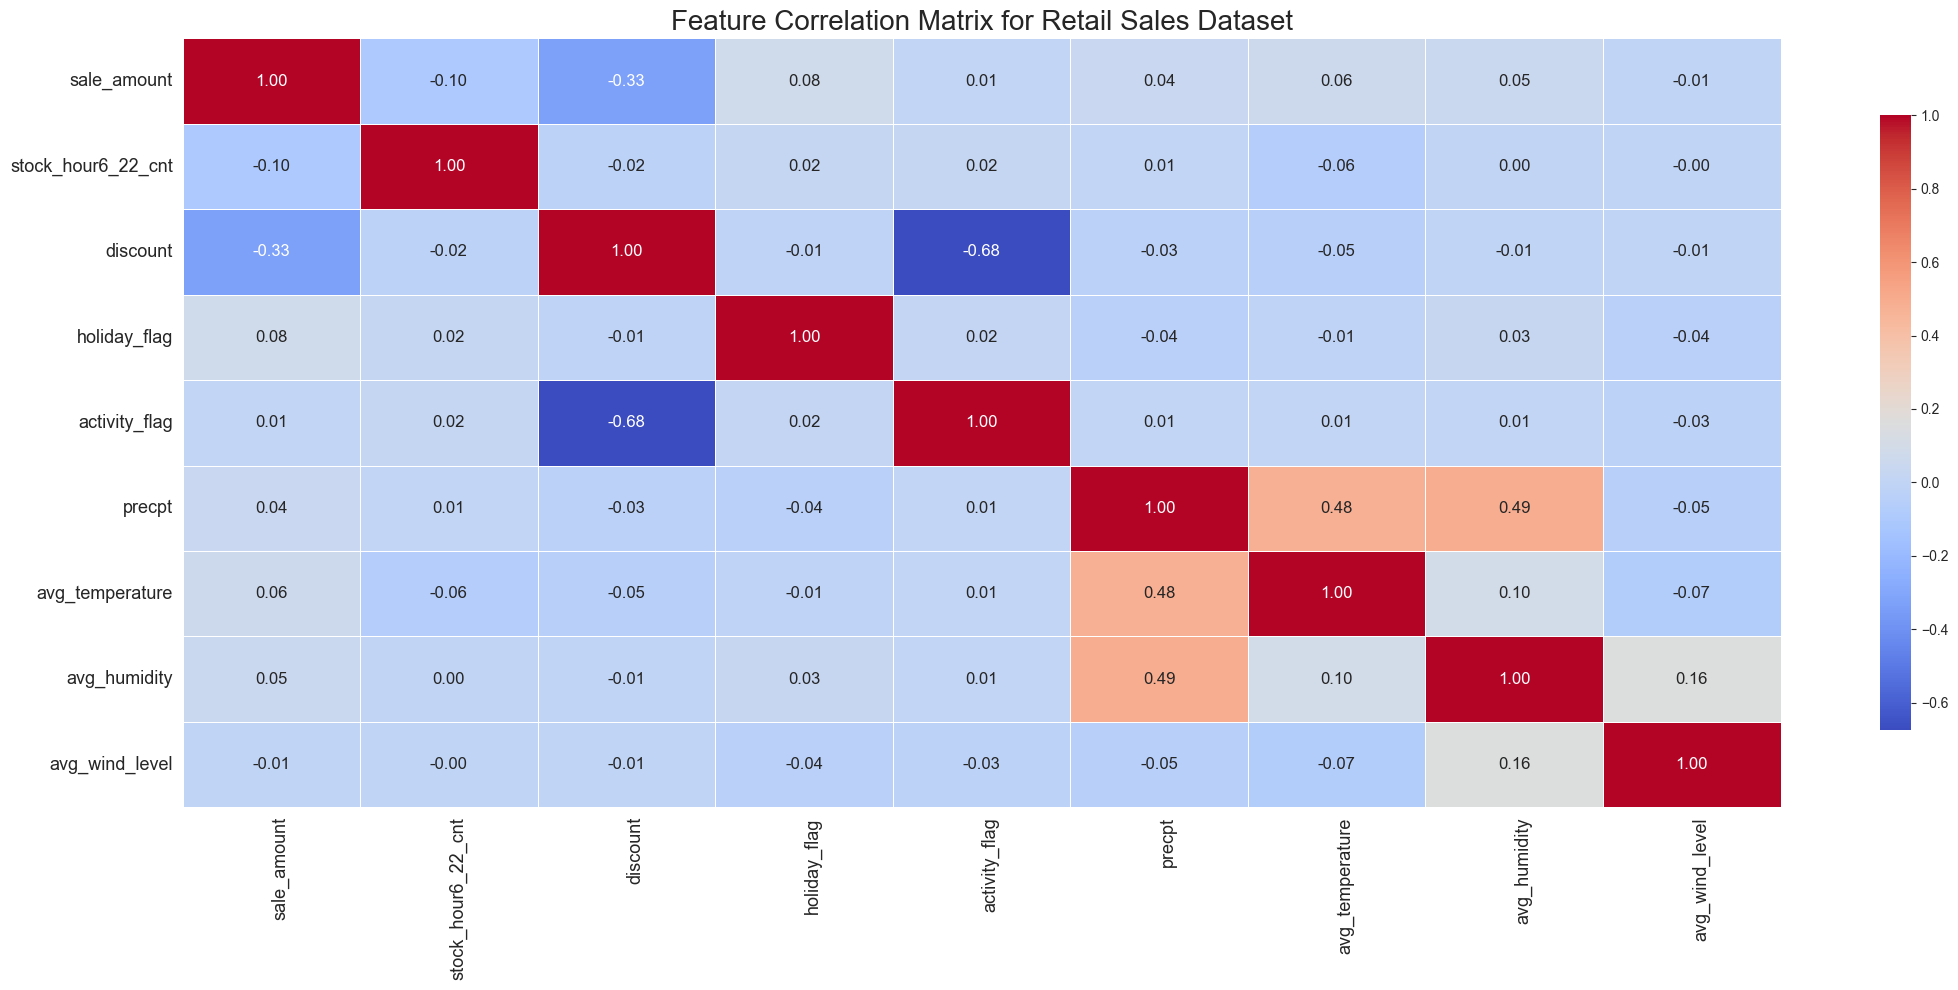

In [15]:
cols = ['sale_amount', 'stock_hour6_22_cnt','discount','holiday_flag','activity_flag',
        'precpt','avg_temperature','avg_humidity','avg_wind_level']

corr = data_all[cols].corr()

plt.figure(figsize=(22, 10))

ax = sbn.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.6,
    linecolor="white",
    annot_kws={"size": 12},
    cbar_kws={"shrink": 0.8}
)

plt.title("Feature Correlation Matrix for Retail Sales Dataset", fontsize=20)

# ===== FIX TRỤC X KHÔNG KHÍT – BÁM VÀO Ô =====
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    ha='right',
    rotation_mode='anchor',
    fontsize=13
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    fontsize=13
)

plt.tight_layout()
plt.show()

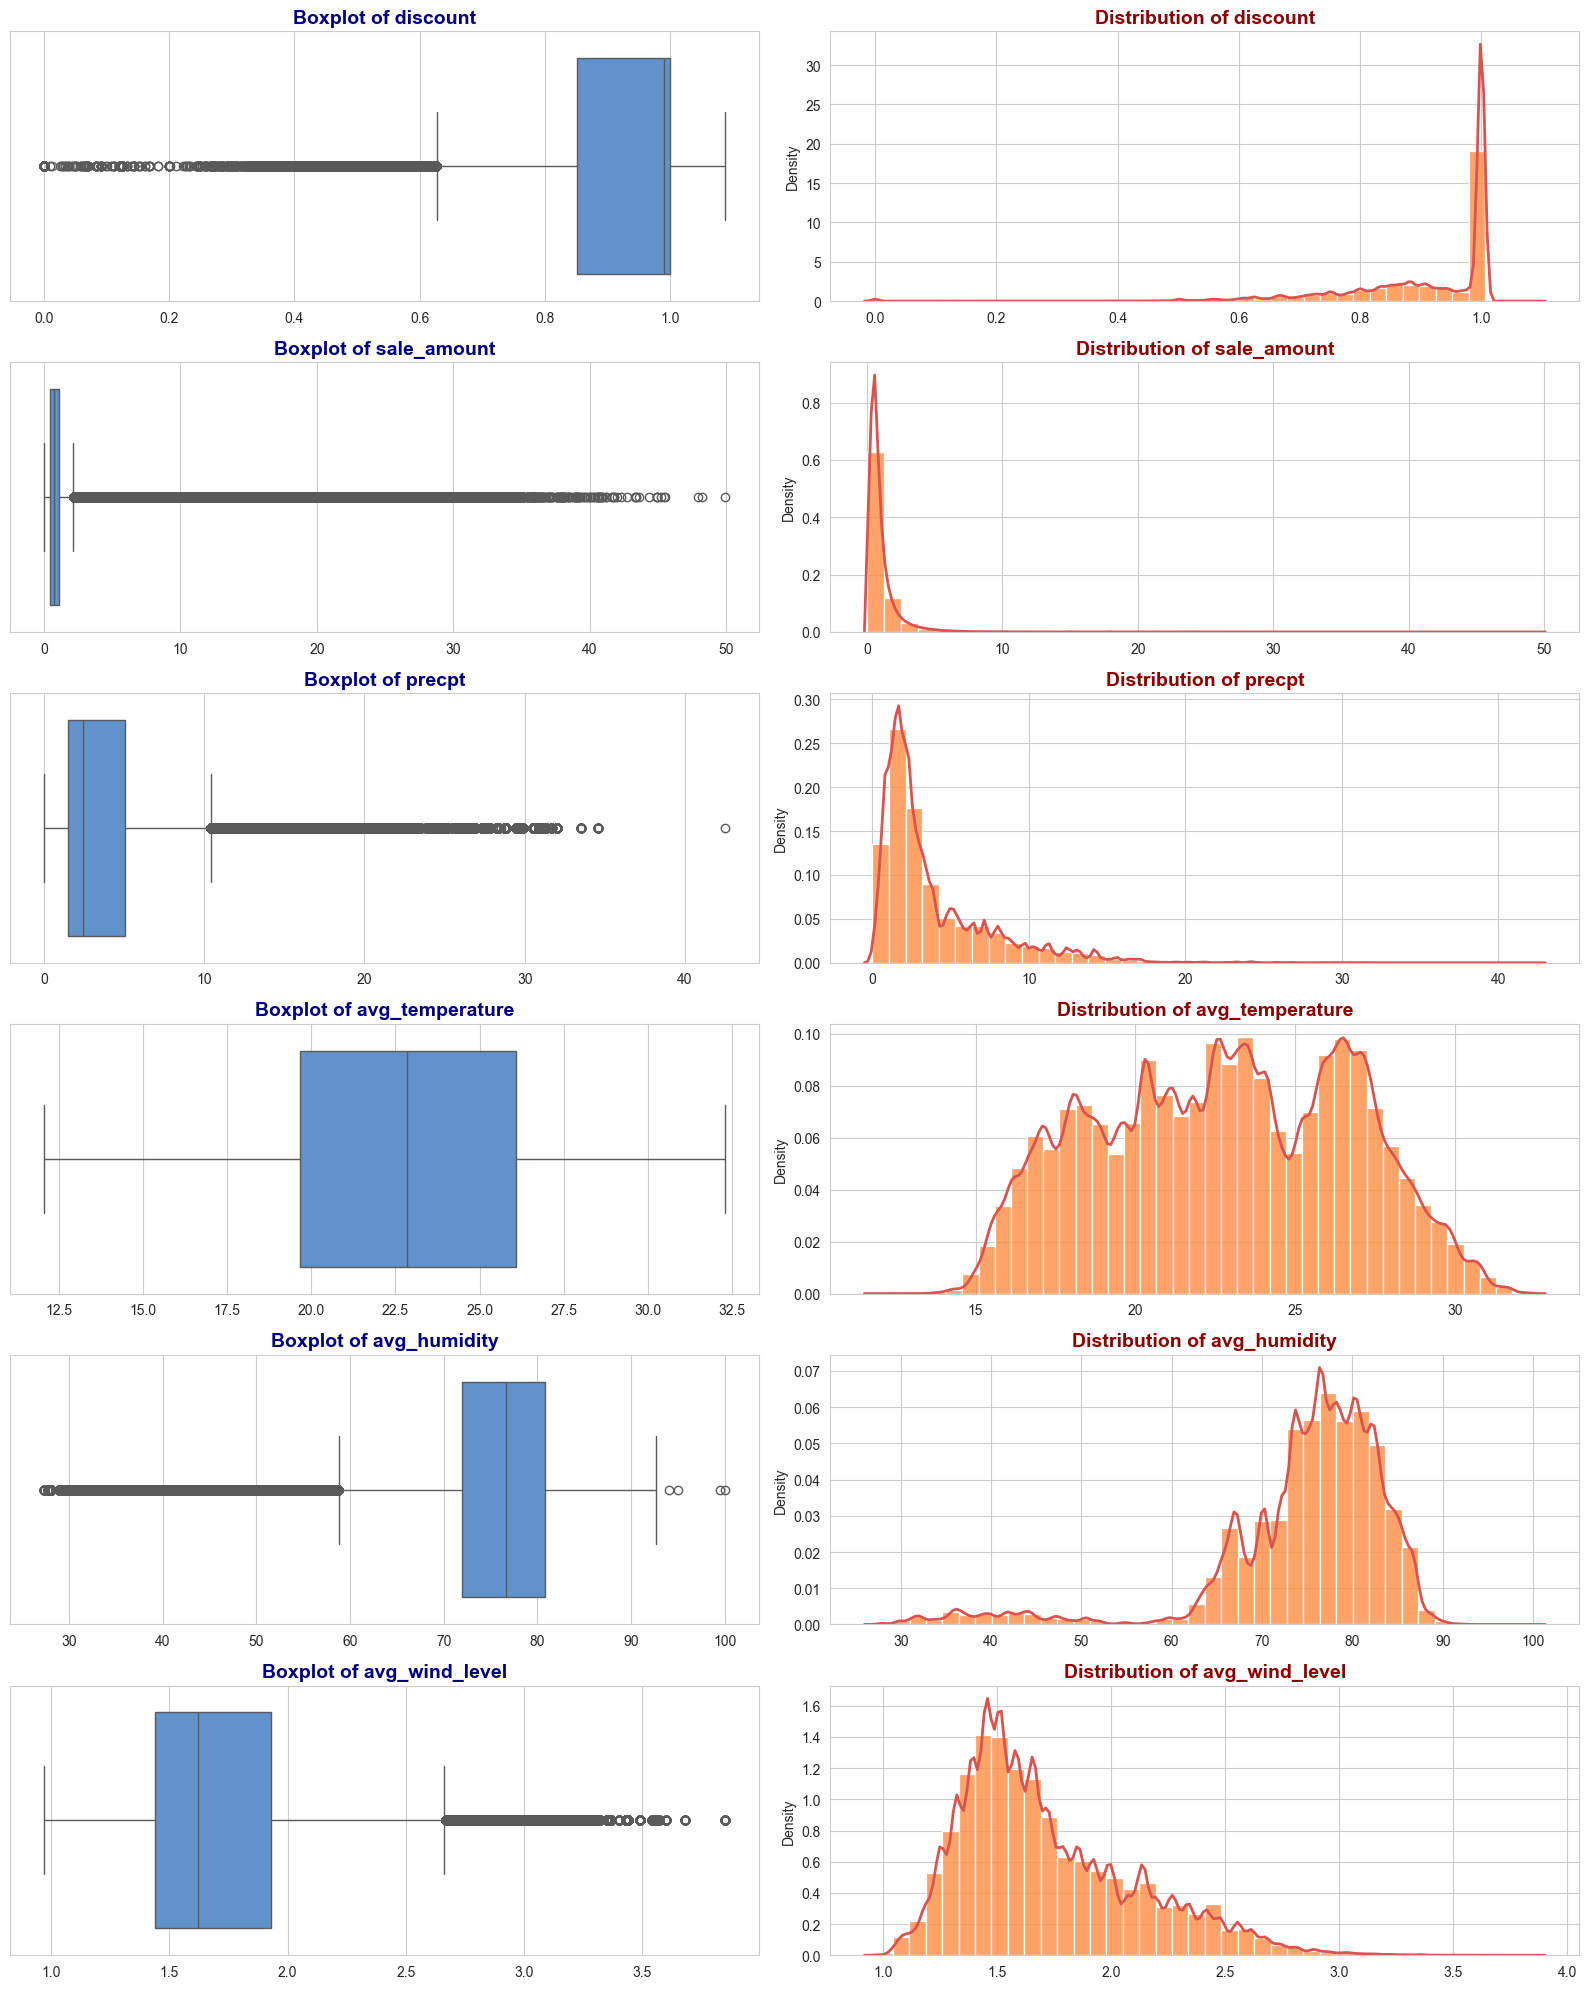

In [16]:
cols = ['discount','sale_amount','precpt','avg_temperature','avg_humidity','avg_wind_level']

sbn.set_style("whitegrid")
plt.figure(figsize=(16, 20))

for i, col in enumerate(cols, 1):

    # BOX
    plt.subplot(len(cols), 2, 2*i - 1)
    sbn.boxplot(x=data_all[col], color="#4A90E2", saturation=0.7)
    plt.title(f'Boxplot of {col}', fontsize=14, weight='bold', color='navy')
    plt.xlabel('')

    # HIST + KDE
    plt.subplot(len(cols), 2, 2*i)
    sbn.histplot(data_all[col], bins=40, stat="density",
                 color="#FF8C42", alpha=0.8)
    sbn.kdeplot(data_all[col], color="#D9534F", linewidth=2)
    plt.title(f'Distribution of {col}', fontsize=14, weight='bold', color='darkred')
    plt.xlabel('')

plt.tight_layout()
plt.show()